In [3]:
def arbitrage_opportunity(nse_id, bse_id):
    import pandas as pd
    import datetime
    tick_data = pd.read_csv('log_raw.csv')
    tick_data.timestamp = pd.to_datetime(tick_data.timestamp)
    # filter-out pre-market data. 03:45 UTC means 9:15 IST. 9:00 to 9:15 is pe-market session
    tick_data = tick_data.loc[tick_data.timestamp > '2017-06-19 03:45:00.000']
    stock_nse = tick_data[tick_data.instrument_token == nse_id]
    stock_bse = tick_data[tick_data.instrument_token == bse_id]
    print "bse feed mean interval",stock_bse.timestamp.diff().fillna(0).mean()
    print "bse feed sd", stock_bse.timestamp.diff().fillna(0).std()
    print "nse feed mean interval", stock_nse.timestamp.diff().fillna(0).mean()
    print "nse feed sd",stock_nse.timestamp.diff().fillna(0).std()
    stock_time = stock_bse['timestamp'].apply(lambda d: d.time())
    stock_bse['timestamp'] = stock_time
    stock_time = stock_nse['timestamp'].apply(lambda d: d.time())
    stock_nse['timestamp'] = stock_time
    # Now we can make the timestamp column an unique index column for BSE and NSE
    stock_bse = stock_bse.set_index(['timestamp'])
    # drop the index name. Cause I dont like it
    del stock_bse.index.name
    stock_nse = stock_nse.set_index(['timestamp'])
    # drop the index name. Cause I dont like it
    del stock_nse.index.name
    import matplotlib.pyplot as plt 
    from pylab import rcParams
    rcParams['figure.figsize'] = 25, 10
    fig, ax = plt.subplots()
    ax.plot_date(stock_bse.index, stock_bse.last_price,'v-')
    ax.plot_date(stock_nse.index, stock_nse.last_price, 'v-')
    plt.show()

In [2]:
%matplotlib inline

bse feed mean interval 0 days 00:00:01.852426
bse feed sd 0 days 00:00:01.479400
nse feed mean interval 0 days 00:00:01.970223
nse feed sd 0 days 00:00:01.454147


C:\Users\Dipanjan\Anaconda2\lib\site-packages\ipykernel\__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Dipanjan\Anaconda2\lib\site-packages\ipykernel\__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


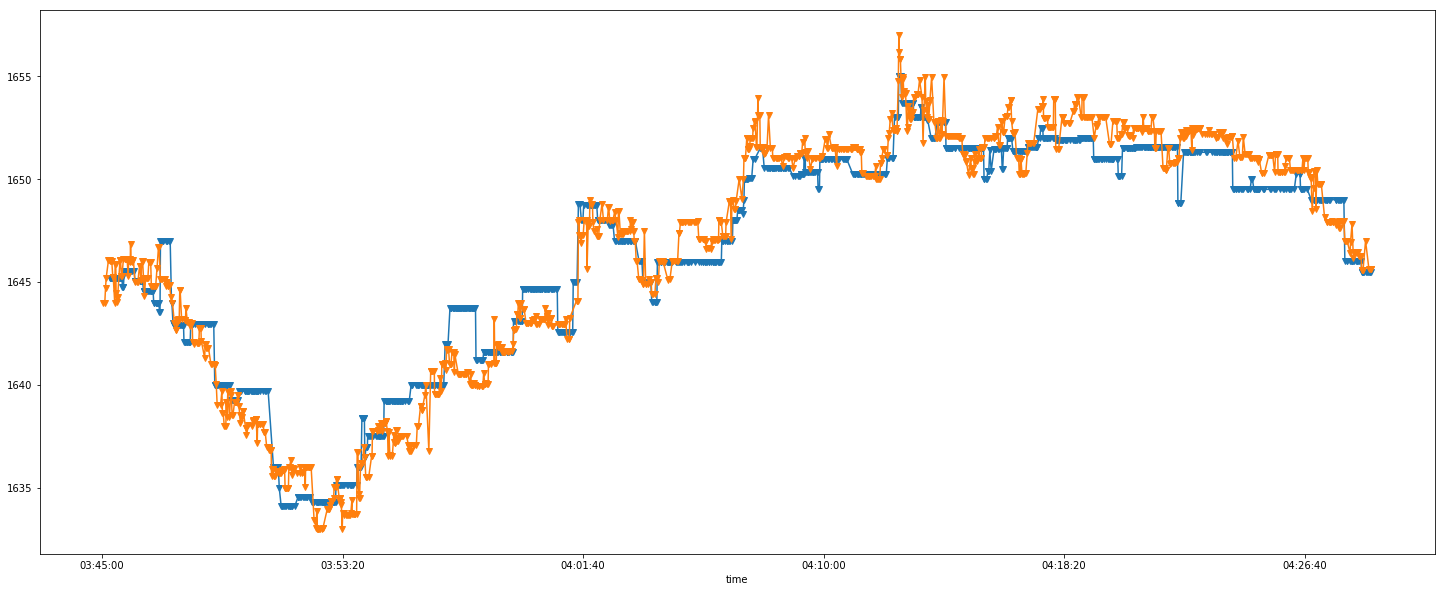

In [4]:
arbitrage_opportunity(5633,128104964)